<a href="https://colab.research.google.com/github/SunitMitra/Sentiment-Analysis-Major-Project/blob/main/ML_MAJOR_JAN_ML_01BS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

import pickle

import sys

import os

import io

import re

from sys import path

import numpy as np

import pickle

import nltk

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt

from string import punctuation, digits

from IPython.core.display import display, HTML

from nltk.corpus import stopwords

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer


In [ ]:
#Amazon Data

input_file ="/content/amazon_cells_labelled.txt"

amazon = pd.read_csv(input_file,delimiter='\t',header=None)

amazon.columns = ['Sentence','Class']

#Yelp Data

input_file = "/content/yelp_labelled.txt"

yelp = pd.read_csv(input_file,delimiter='\t',header=None)

yelp.columns = ['Sentence','Class']

#Imdb Data

input_file = "/content/imdb_labelled.txt"

imdb = pd.read_csv(input_file,delimiter='\t',header=None)

imdb.columns = ['Sentence','Class']

#combine all data sets

data = pd.DataFrame()

data = pd.concat([amazon, yelp, imdb])

data['index'] = data.index

data

,Sentence,Class,index
0,So there is no way for me to plug it in here i...,0,0
1,"Good case, Excellent value.",1,1
2,Great for the jawbone.,1,2
3,Tied to charger for conversations lasting more...,0,3
4,The mic is great.,1,4
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,743
744,"Unfortunately, any virtue in this film's produ...",0,744
745,"In a word, it is embarrassing.",0,745
746,Exceptionally bad!,0,746


   Class  COUNT
0      0    846
1      1    827


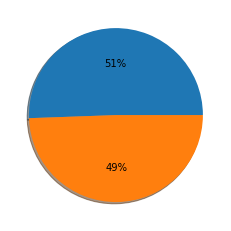

In [ ]:
#Total Count of Each Category

pd.set_option('display.width', 4000)

pd.set_option('display.max_rows', 1000)

distOfDetails = data.groupby(by='Class', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index', ascending=False)

distOfDetails.columns =['Class', 'COUNT']

print(distOfDetails)

#Distribution of All Categories

plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=360)

plt.show()

In [ ]:
#Text Preprocessing

columns = ['index','Class', 'Sentence']

df_ = pd.DataFrame(columns=columns)

#lower string

data['Sentence'] = data['Sentence'].str.lower()

#remove email adress

data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)

#remove IP address

data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)

#remove punctaitions and special chracters

data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')

#remove numbers

data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)

#remove stop words

for index, row in data.iterrows():

    word_tokens = word_tokenize(row['Sentence'])

    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]

    df_ = df_.append({"index": row['index'], "Class":  row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)

data = df_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'),data['Class'].values.astype('int32'), test_size=0.10, random_state=0)

classes  = data['Class'].unique()

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import SGDClassifier

#grid search result

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 

counts = vectorizer.fit_transform(X_train)

vocab = vectorizer.vocabulary_

classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')

targets = y_train

classifier = classifier.fit(counts, targets)

example_counts = vectorizer.transform(X_test)

predictions = classifier.predict(example_counts)

In [ ]:
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import classification_report

#Model Evaluation

acc = accuracy_score(y_test, predictions, normalize=True)

hit = precision_score(y_test, predictions, average=None,labels=classes)

capture = recall_score(y_test, predictions, average=None,labels=classes)

print('Model Accuracy:%.2f'%acc)

print(classification_report(y_test, predictions))

Model Accuracy:0.82
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       139
           1       0.83      0.81      0.82       136

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



In [ ]:
#source: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=False,

                          title='Confusion matrix',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        #print("Normalized confusion matrix")

    else:

        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

    plt.figure(figsize=(150,100))

,Category,Index
0,0,1
1,1,2


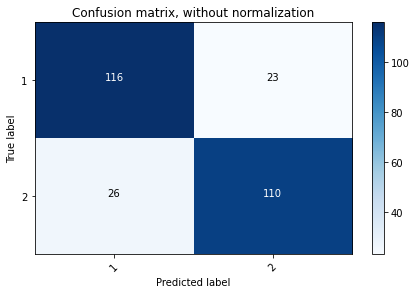

<Figure size 10800x7200 with 0 Axes>

In [ ]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, predictions,classes)

np.set_printoptions(precision=2)

class_names = range(1,classes.size+1)

# Plot non-normalized confusion matrix

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

classInfo = pd.DataFrame(data=[])

for i in range(0,classes.size):

    classInfo = classInfo.append([[classes[i],i+1]],ignore_index=True)

classInfo.columns=['Category','Index']

classInfo
